In [8]:
import pandas as pd
df1=pd.read_csv('台中市房價.csv')
print('連結完成')
print(df1.head(10))
print('檔案開啟後進行編碼轉換')
df1.to_csv('台中市房價2.csv', encoding='utf-8-sig')
df2=pd.read_csv('台中市房價2.csv')
print('連結完成')
print(df2.head(10))

連結完成
           經度         緯度    屋齡     面積             建物類型   用途        樓高/樓別  \
0  120.689375  24.129121  28.0  36.87    華廈(10層含以下有電梯)  住家用        五層/七層   
1  120.695265  24.147002  26.0   9.62     套房(1房(1廳)1衛)  住家用        六層/七層   
2  120.690512  24.126875  37.0  58.99    華廈(10層含以下有電梯)  住家用        三層/七層   
3  120.689970  24.127208   2.0  48.48  住宅大樓(11層含以上有電梯)  住家用       四層/十三層   
4  120.707178  24.148389   NaN  48.16  住宅大樓(11層含以上有電梯)  住家用     十一層/二十四層   
5  120.699431  24.128599   2.0  49.44  住宅大樓(11層含以上有電梯)  住家用       二層/十三層   
6  120.695748  24.146642  32.0  43.49    華廈(10層含以下有電梯)  住商用  一層,二層,騎樓/七層   
7  120.700913  24.134435  16.0  44.11  住宅大樓(11層含以上有電梯)  住家用       九層/十五層   
8  120.689046  24.126556  41.0  18.03    華廈(10層含以下有電梯)  住家用        六層/七層   
9  120.699643  24.139119  27.0  37.37  住宅大樓(11層含以上有電梯)  住家用      十二層/十四層   

       佈局 電梯 管理員  車位數量          價格 行政區  交易年份  
0  3房2廳2衛  有   無     1   8,980,000  東區   111  
1  1房1廳1衛  有   有     0   1,910,000  東區   111  
2  5房3廳3衛  有   有 

In [9]:
print('查找遺失值1')
print(df1.isnull().sum())#計算遺失值數量
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(df1.dtypes) #全部欄位的資料型態
print(df1.shape) #全部資料數量與欄位數量

查找遺失值1
經度           0
緯度           0
屋齡       55315
面積           0
建物類型         2
用途          14
樓高/樓別        0
佈局       11396
電梯           0
管理員          0
車位數量         0
價格           0
行政區          0
交易年份         0
dtype: int64
查看每個欄位的資料型態
主要目的查看那些欄位是object，object代表文字型態
經度       float64
緯度       float64
屋齡       float64
面積        object
建物類型      object
用途        object
樓高/樓別     object
佈局        object
電梯        object
管理員       object
車位數量       int64
價格        object
行政區       object
交易年份       int64
dtype: object
(234904, 14)


In [10]:
print('刪除資料之前可先查看資料分布狀態')
print('屋齡有55315筆資料有遺失值，屋齡不適合用填充的方式，所以選擇刪除')
print('建物類型有2筆,因筆數不多 不適合用填充的方式，所以選擇刪除，不過可以先確認資料分布狀態')
print('用途有14筆,因筆數不多 不適合用填充的方式，所以選擇刪除，不過可以先確認資料分布狀態')
print('佈局有11396筆資料有遺失值，屋齡不適合用填充的方式，所以選擇刪除')
print('刪除屋齡的遺失值之後其他遺失值是否就不見了?')
print(df1['屋齡'].value_counts()) #查看屋齡欄位的資料分布狀態
print('屋齡是數值資料共有95種組合，後續可以做資料整併處理，所以刪除遺失值')
df1.dropna(subset=['屋齡'],inplace=True) #刪除屋齡遺失值
print(df1.isnull().sum()) #查看遺失值狀態
print(df1.shape) #查看資料形狀
try:
  print(df1['佈局'].value_counts())
except:
  print('佈局欄位不存在')
#df1.to_html('output1.html')
print('佈局有1087種組合，文字資料不適合拿來做分類的資料，編碼後產生1087個欄位')
print('若欄位重要，幾房幾廳幾衛確實也得考慮，後續得做PCA降維，若不重要建議刪除')
print('我們先選擇刪除')
try:
  df1.drop(['佈局'],axis=1,inplace=True)
except:
  print('佈局欄位不存在')
print(df1.isnull().sum())
print(df1.shape)
try:
  print(df1['用途'].value_counts())
except:
  print('用途欄位不存在')
print('假設這八筆可能是農業用，但若登記於最多的住家用，會有爭議')  
print('我們選擇刪除')
try:
  df1.drop(['用途'],axis=1,inplace=True)
except:
  print('用途欄位不存在')
print(df1.isnull().sum())
print(df1.shape)
try:
  print(df1['建物類型'].value_counts())
except:
  print('建物類型欄位不存在')
print('假設這兩筆可能是農舍，但若登記於最多的住宅大樓(11層含以上有電梯)，會有爭議')  
print('我們選擇刪除')
try:
  df1.drop(['建物類型'],axis=1,inplace=True)
except:
  print('建物類型欄位不存在')  
print(df1.isnull().sum())
print(df1.shape)  

刪除資料之前可先查看資料分布狀態
屋齡有55315筆資料有遺失值，屋齡不適合用填充的方式，所以選擇刪除
建物類型有2筆,因筆數不多 不適合用填充的方式，所以選擇刪除，不過可以先確認資料分布狀態
用途有14筆,因筆數不多 不適合用填充的方式，所以選擇刪除，不過可以先確認資料分布狀態
佈局有11396筆資料有遺失值，屋齡不適合用填充的方式，所以選擇刪除
刪除屋齡的遺失值之後其他遺失值是否就不見了?
屋齡
1.0      13222
2.0       8898
22.0      6832
23.0      6814
20.0      6681
         ...  
80.0         1
93.0         1
108.0        1
81.0         1
102.0        1
Name: count, Length: 95, dtype: int64
屋齡是數值資料共有95種組合，後續可以做資料整併處理，所以刪除遺失值
經度          0
緯度          0
屋齡          0
面積          0
建物類型        2
用途          8
樓高/樓別       0
佈局       9062
電梯          0
管理員         0
車位數量        0
價格          0
行政區         0
交易年份        0
dtype: int64
(179589, 14)
佈局
3房2廳2衛      54450
4房2廳2衛      16422
1房1廳1衛      16056
2房2廳1衛      10895
1房0廳1衛       8417
            ...  
26房1廳16衛        1
4房1廳7衛          1
12房5廳3衛         1
25房0廳26衛        1
30房0廳0衛         1
Name: count, Length: 1087, dtype: int64
佈局有1087種組合，文字資料不適合拿來做分類的資料，編碼後產生1087個欄位
若欄位重要，幾房幾廳幾衛確實也得考慮，後續得做PCA降維，若不重要建議刪除
我們先選擇刪除
經度       0


In [11]:
print('經度、緯度、交易年份這三個欄位可以刪除，不用參加模型的訓練')
try:
  df1.drop(['經度'],axis=1,inplace=True)
  df1.drop(['緯度'],axis=1,inplace=True)  
  df1.drop(['交易年份'],axis=1,inplace=True)   
except:
  print('經度、緯度、交易年份欄位不存在')
print('遺失值乍看之下沒有，我們再來做一個動作確認')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in df1.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',df1[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在')
  if df1[i].dtype==object:
    try:
      df1[i]=df1[i].astype('float') #轉換
      list3.append(i) #轉換成功
      print('轉換成功')
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)
print('有些欄位其實得做處理，才符合她所代表的意義')

經度、緯度、交易年份這三個欄位可以刪除，不用參加模型的訓練
遺失值乍看之下沒有，我們再來做一個動作確認
分成數值與字串兩種欄位資料紀錄
欄位名稱: 屋齡
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 面積
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 樓高/樓別
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 電梯
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 管理員
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 車位數量
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 價格
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 行政區
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
數值欄位: ['屋齡', '車位數量']
文字欄位: ['面積', '樓高/樓別', '電梯', '管理員', '價格', '行政區']
有些欄位其實得做處理，才符合她所代表的意義


In [12]:
print('有些欄位其實得做處理，才符合她所代表的意義?')
print(df1.head())
print('面積為何是文字欄位不是數字')
print('樓高/樓別是兩個資料')
print('電梯是無與有，可以做轉換')
print('管理員為何是文字欄位不是數字')
print('價格為何是文字欄位不是數字')
print('模型的目的是要做甚麼?')
print('1.想要知道價格，預估價格，這就是迴歸')
print('2.想要知道屋齡，預估屋齡，這就是迴歸')
print('3.想要知道這樣的房子在哪一個行政區，這就是分類')

有些欄位其實得做處理，才符合她所代表的意義?
     屋齡     面積   樓高/樓別 電梯 管理員  車位數量          價格 行政區
0  28.0  36.87   五層/七層  有   無     1   8,980,000  東區
1  26.0   9.62   六層/七層  有   有     0   1,910,000  東區
2  37.0  58.99   三層/七層  有   有     0  12,050,000  東區
3   2.0  48.48  四層/十三層  有   有     1  13,000,000  東區
5   2.0  49.44  二層/十三層  有   有     1  10,800,000  東區
面積為何是文字欄位不是數字
樓高/樓別是兩個資料
電梯是無與有，可以做轉換
管理員為何是文字欄位不是數字
價格為何是文字欄位不是數字
模型的目的是要做甚麼?
1.想要知道價格，預估價格，這就是迴歸
2.想要知道屋齡，預估屋齡，這就是迴歸
3.想要知道這樣的房子在哪一個行政區，這就是分類


In [13]:
print('面積為何是文字欄位不是數字')
for i in df1['面積']:
  try:
    float(i)
  except:
    print('不能轉換：',i)
print('將逗點取消後轉換為浮點數')
try:
  df1['面積']=df1['面積'].str.replace(',','').astype(float) #轉換
except:
  pass
print(df1['面積'].dtype)
print('價格為何是文字欄位不是數字')
for i in df1['價格']:
  try:
    float(i)
  except:
    print('不能轉換：',i)
print('將逗點取消後轉換為浮點數')
try:
  df1['價格']=df1['價格'].str.replace(',','').astype(float)
except:
  pass
print(df1['價格'].dtype)  

面積為何是文字欄位不是數字
不能轉換： 2,044.33
不能轉換： 8,571.17
不能轉換： 38,035.63
不能轉換： 1,415.37
不能轉換： 1,655.79
不能轉換： 2,432.15
不能轉換： 1,149.26
不能轉換： 4,257.31
不能轉換： 1,018.40
不能轉換： 2,559.59
不能轉換： 1,329.64
不能轉換： 1,001.14
不能轉換： 2,012.32
不能轉換： 1,342.47
不能轉換： 24,099.76
不能轉換： 1,048.76
不能轉換： 2,885.42
不能轉換： 1,538.92
不能轉換： 1,034.47
不能轉換： 2,278.32
不能轉換： 1,062.51
不能轉換： 1,176.74
不能轉換： 4,561.65
不能轉換： 21,844.61
不能轉換： 1,011.54
不能轉換： 2,319.35
不能轉換： 2,319.35
不能轉換： 1,171.96
不能轉換： 1,332.05
不能轉換： 4,007.64
不能轉換： 1,144.37
不能轉換： 1,912.71
不能轉換： 2,198.00
不能轉換： 2,205.54
不能轉換： 1,011.54
不能轉換： 2,630.28
不能轉換： 1,137.76
不能轉換： 1,448.58
不能轉換： 2,460.09
不能轉換： 1,890.00
不能轉換： 2,796.29
不能轉換： 2,216.38
不能轉換： 3,779.29
不能轉換： 1,403.40
不能轉換： 1,008.04
不能轉換： 2,299.47
不能轉換： 2,028.98
不能轉換： 1,001.63
不能轉換： 15,341.25
不能轉換： 1,084.61
不能轉換： 2,208.45
不能轉換： 2,208.45
不能轉換： 2,208.45
不能轉換： 2,420.65
不能轉換： 15,341.25
不能轉換： 1,403.40
不能轉換： 1,849.45
不能轉換： 7,852.70
不能轉換： 2,596.46
不能轉換： 1,321.98
不能轉換： 1,710.07
不能轉換： 23,529.22
不能轉換： 1,017.40
不能轉換： 1,168.09
不能轉換： 1,175.43
不能轉換：

KeyboardInterrupt: 

In [14]:
print('電梯是無與有，可以做轉換')
print('管理員是無與有，可以做轉換')
if df1['電梯'].dtype==object:
  df1['電梯']=df1['電梯'].map({'有':2,'無':1})
if df1['管理員'].dtype==object:  
  df1['管理員']=df1['管理員'].map({'有':2,'無':1})
print(df1.head())
print(df1.dtypes)

電梯是無與有，可以做轉換
管理員是無與有，可以做轉換
     屋齡     面積   樓高/樓別  電梯  管理員  車位數量          價格 行政區
0  28.0  36.87   五層/七層   2    1     1   8,980,000  東區
1  26.0   9.62   六層/七層   2    2     0   1,910,000  東區
2  37.0  58.99   三層/七層   2    2     0  12,050,000  東區
3   2.0  48.48  四層/十三層   2    2     1  13,000,000  東區
5   2.0  49.44  二層/十三層   2    2     1  10,800,000  東區
屋齡       float64
面積       float64
樓高/樓別     object
電梯         int64
管理員        int64
車位數量       int64
價格        object
行政區       object
dtype: object


In [15]:
print('樓高/樓別是兩個資料')
try:
  print(df2['樓高/樓別'].value_counts())  
  df2[['樓高','樓別']]=df2['樓高/樓別'].str.split('/',expand=True)
  df2.drop(['樓高/樓別'],axis=1,inplace=True)
except:
  pass
print(df2.head())
print(df2['樓高'].value_counts())
print(df2['樓別'].value_counts())

樓高/樓別是兩個資料
樓高/樓別
全/四層                10743
全/二層                 8664
全/三層                 4810
五層/五層                4004
全/五層                 3903
                    ...  
夾層/十二層                  1
一層,二層,三層,地下一層/三層        1
五層,六層,七層/十四層            1
地下一層/二十九層               1
五層,六層/十八層               1
Name: count, Length: 1978, dtype: int64
   Unnamed: 0          經度         緯度    屋齡     面積             建物類型   用途  \
0           0  120.689375  24.129121  28.0  36.87    華廈(10層含以下有電梯)  住家用   
1           1  120.695265  24.147002  26.0   9.62     套房(1房(1廳)1衛)  住家用   
2           2  120.690512  24.126875  37.0  58.99    華廈(10層含以下有電梯)  住家用   
3           3  120.689970  24.127208   2.0  48.48  住宅大樓(11層含以上有電梯)  住家用   
4           4  120.707178  24.148389   NaN  48.16  住宅大樓(11層含以上有電梯)  住家用   

       佈局 電梯 管理員  車位數量          價格 行政區  交易年份   樓高    樓別  
0  3房2廳2衛  有   無     1   8,980,000  東區   111   五層    七層  
1  1房1廳1衛  有   有     0   1,910,000  東區   111   六層    七層  
2  5房3廳3衛  有   有     0  12,050,0

In [16]:
print('樓高部分，全代表0，文字轉換為整數，然後我們先預設50層')
to_num={
'一層':1,'二層':2,'三層':3,'四層':4,'五層':5,'六層':6,'七層':7,'八層':8,'九層':9,'十層':10,
'十一層':11,'十二層':12,'十三層':13,'十四層':14,'十五層':15,'十六層':16,'十七層':17,'十八層':18,'十九層':9,'二十層':20,            
'二十一層':21,'二十二層':22,'二十三層':23,'二十四層':24,'二十五層':25,'二十六層':26,'二十七層':27,'二十八層':28,'二十九層':29,'三十層':30,         
'三十一層':31,'三十二層':32,'三十三層':33,'三十四層':34,'三十五層':35,'三十六層':36,'三十七層':37,'三十八層':38,'三十九層':39,'四十層':40,  
'四十一層':41,'四十二層':42,'四十三層':43,'四十四層':44,'四十五層':45,'四十六層':46,'四十七層':47,'四十八層':48,'四十九層':49,'五十層':50,
'全':0,'地下層':51,'屋頂突出物':52,'夾層':53,'騎樓':54                             
}
df2['樓高num']=df2['樓高'].map(to_num)
print(df2['樓高num'].value_counts())
print(df2['樓高num'])#為什麼是float原因因為有遺失值存在
print('樓高太複雜的選項程式無法處理，得個別由專人處理')
df2.dropna(subset=['樓高num'],inplace=True)
print(df2['樓高'].value_counts())
df2['樓別num']=df2['樓別'].map(to_num)
print(df2['樓別num'].value_counts())
#print(df2['樓別num'])#為什麼是float原因因為有遺失值存在
df2.dropna(subset=['樓別num'],inplace=True)
print(df2['樓別'].value_counts())
print(df2.shape)

樓高部分，全代表0，文字轉換為整數，然後我們先預設50層
樓高num
0.0     29693
5.0     19287
4.0     19256
3.0     17699
6.0     15181
7.0     14588
9.0     13045
2.0     12584
8.0     12366
10.0    10847
11.0    10368
12.0     9793
13.0     7575
14.0     6662
15.0     4627
1.0      4122
16.0     2599
17.0     2186
18.0     2033
20.0     1526
21.0     1346
22.0     1138
23.0      902
24.0      739
25.0      449
26.0      394
27.0      317
28.0      269
29.0      149
51.0      138
30.0      107
31.0      101
32.0       66
33.0       56
34.0       43
35.0       33
36.0       21
37.0       15
38.0        7
39.0        6
42.0        3
40.0        3
53.0        3
52.0        3
41.0        2
Name: count, dtype: int64
0          5.0
1          6.0
2          3.0
3          4.0
4         11.0
          ... 
234899    11.0
234900     NaN
234901     0.0
234902     5.0
234903    10.0
Name: 樓高num, Length: 234904, dtype: float64
樓高太複雜的選項程式無法處理，得個別由專人處理
樓高
全        29693
五層       19287
四層       19256
三層       17699
六層       1518

In [17]:
print(df2['行政區'].value_counts()) #查看行政區分布狀態
print('行政區若要當作y得轉換為整數，若是x參與訓練也得是整數，整數值可以調整，沒有大小之分')
to_num2={
'西屯區':1,'北屯區':2,'北區':3,'南屯區':4,'南區':5,'西區':6,'東區':7,'中區':8                           
}
df2['行政區num']=df2['行政區'].map(to_num2)
print(df2['行政區num'].value_counts())

行政區
北屯區    62140
西屯區    49114
南屯區    31394
北區     27303
南區     21507
西區     17604
東區      9340
中區      3897
Name: count, dtype: int64
行政區若要當作y得轉換為整數，若是x參與訓練也得是整數，整數值可以調整，沒有大小之分
行政區num
2    62140
1    49114
4    31394
3    27303
5    21507
6    17604
7     9340
8     3897
Name: count, dtype: int64


In [18]:
print('遺失值乍看之下沒有，我們再來做一個動作確認')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in df2.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',df2[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在')
  if df2[i].dtype==object:
    try:
      df2[i]=df2[i].astype('float') #轉換
      list3.append(i) #轉換成功
      print('轉換成功')
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)
print('有些欄位其實得做處理，才符合她所代表的意義')

遺失值乍看之下沒有，我們再來做一個動作確認
分成數值與字串兩種欄位資料紀錄
欄位名稱: Unnamed: 0
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 經度
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 緯度
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 屋齡
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 面積
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 建物類型
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 用途
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 佈局
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 電梯
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 管理員
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 車位數量
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 價格
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 行政區
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能

In [19]:
print('欄位名稱改為英文')
df3=df2.copy()
print(df2.columns)
try:
  df3.drop(['行政區'],axis=1,inplace=True)
  df3.drop(['樓高'],axis=1,inplace=True)
  df3.drop(['樓別'],axis=1,inplace=True)    
except:
  pass
df3=df3.rename(
columns={
 '屋齡':'Building_Age',
 '面積':'Area',
 '電梯':'Elevator',
 '管理員':'Manager',        
 '車位數量':'Number_of_Parking_Spaces',
 '價格':'Price',
 '車位數量':'Number_of_Parking_Spaces',
 '價格':'Price',  
 '行政區num':'District2',
 '樓高num':'Building_Height2',
 '樓別num':'Building_Type2',
}    
)
print(df3.head())

欄位名稱改為英文
Index(['Unnamed: 0', '經度', '緯度', '屋齡', '面積', '建物類型', '用途', '佈局', '電梯', '管理員',
       '車位數量', '價格', '行政區', '交易年份', '樓高', '樓別', '樓高num', '樓別num', '行政區num'],
      dtype='object')
   Unnamed: 0          經度         緯度  Building_Age   Area             建物類型  \
0           0  120.689375  24.129121          28.0  36.87    華廈(10層含以下有電梯)   
1           1  120.695265  24.147002          26.0   9.62     套房(1房(1廳)1衛)   
2           2  120.690512  24.126875          37.0  58.99    華廈(10層含以下有電梯)   
3           3  120.689970  24.127208           2.0  48.48  住宅大樓(11層含以上有電梯)   
4           4  120.707178  24.148389           NaN  48.16  住宅大樓(11層含以上有電梯)   

    用途      佈局 Elevator Manager  Number_of_Parking_Spaces       Price  交易年份  \
0  住家用  3房2廳2衛        有       無                         1   8,980,000   111   
1  住家用  1房1廳1衛        有       有                         0   1,910,000   111   
2  住家用  5房3廳3衛        有       有                         0  12,050,000   111   
3  住家用  3房2廳2衛        有      

In [20]:
print('遺失值乍看之下沒有，我們再來做一個動作確認')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in df3.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',df3[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在')
  if df3[i].dtype==object:
    try:
      df3[i]=df3[i].astype('float') #轉換
      list3.append(i) #轉換成功
      print('轉換成功')
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)
print('有些欄位其實得做處理，才符合她所代表的意義')

遺失值乍看之下沒有，我們再來做一個動作確認
分成數值與字串兩種欄位資料紀錄
欄位名稱: Unnamed: 0
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 經度
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: 緯度
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Building_Age
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Area
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 建物類型
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 用途
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 佈局
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Elevator
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Manager
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Number_of_Parking_Spaces
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Price
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: 交易年份
欄位資料型態: int64
假設資

數值部分，以Hist顯示，加入分類
['Unnamed: 0', '經度', '緯度', 'Building_Age', 'Number_of_Parking_Spaces', '交易年份', 'Building_Height2', 'Building_Type2', 'District2']


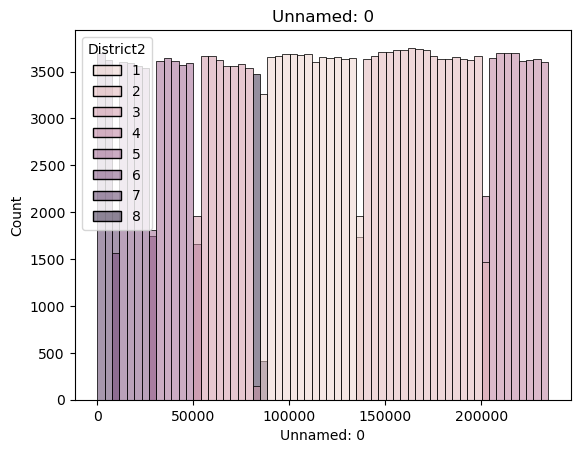

KeyboardInterrupt: 

c:\Users\a0916\miniconda3\envs\James\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32147 (\N{CJK UNIFIED IDEOGRAPH-7D93}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\a0916\miniconda3\envs\James\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


Error in callback <function flush_figures at 0x00000298E5C97A60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [21]:
print('數值部分，以Hist顯示，加入分類')
import matplotlib.pyplot as plt
import seaborn as sns
print(list3)
for cols in list3:
  plt.title(cols)
  sns.histplot(x=cols,data=df3,hue='District2')
  plt.savefig('hist2_'+cols+'.png')
  plt.show()